<a href="https://colab.research.google.com/github/Witcape/3D_Printing/blob/main/ALL_PARAMS_CNN_NORMAL_FINAL_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = "/content/drive/MyDrive/Final_Final/Train"
test_dir = "/content/drive/MyDrive/Final_Final/Test"

# List all image paths and corresponding labels
image_paths = []
labels = []

for class_dir in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_dir)

    if not os.path.isdir(class_path):
        continue

    for img in os.listdir(class_path):
        image_paths.append(os.path.join(class_path, img))
        labels.append(class_dir)  # Use the directory name as the label

# Split into train and validation
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, stratify=labels, random_state=42
)


In [4]:
unique_labels = set(labels)
unique_labels
import pandas as pd

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
# Create DataFrame for training data
train_df = pd.DataFrame({
    "filepath": train_paths,
    "class": train_labels
})

# Create DataFrame for validation data
val_df = pd.DataFrame({
    "filepath": val_paths,
    "class": val_labels
})



val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filepath",
    y_col="class",
    target_size=(299, 299),  # Image size for InceptionV3
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="filepath",
    y_col="class",
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical'
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 700 validated image filenames belonging to 3 classes.
Found 175 validated image filenames belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepath". These filename(s) will be ignored.
  warnings.warn(


Found 387 images belonging to 3 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization

# Define the CNN model
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(299, 299, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 4
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Global Average Pooling
model.add(GlobalAveragePooling2D())

# Fully Connected Layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Regularization
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 299, 299, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 299, 299, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 149, 149, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 149, 149, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 74, 74, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 37, 37, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 489,411 (1.87 MB)

 Trainable params: 488,451 (1.86 MB)

 Non-trainable params: 960 (3.75 KB)

In [7]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 246s 8s/step - accuracy: 0.4403 - loss: 1.2997 - val_accuracy: 0.3600 - val_loss: 1.0964
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 669ms/step - accuracy: 0.4376 - loss: 1.1836 - val_accuracy: 0.3829 - val_loss: 1.1212
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 667ms/step - accuracy: 0.4645 - loss: 1.0651 - val_accuracy: 0.3771 - val_loss: 1.1200
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 721ms/step - accuracy: 0.5355 - loss: 1.0220 - val_accuracy: 0.3771 - val_loss: 1.2582
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 679ms/step - accuracy: 0.5440 - loss: 0.9951 - val_accuracy: 0.3771 - val_loss: 1.4529
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 674ms/step - accuracy: 0.5751 - loss: 0.9777 - val_accuracy: 0.3771 - val_loss: 1.4302
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 663ms/step - accuracy: 0.5845 - loss: 0.9717 - val_accuracy: 0.3771 - val_loss: 1.5745
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 672ms/step - accuracy: 0.5926 - loss: 0.9141 - val_accuracy: 0.3771 

In [8]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 137s 11s/step - accuracy: 0.5795 - loss: 1.3862
Test Accuracy: 0.6486


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step
Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.36      0.51       100
   Spaghetti       0.56      0.84      0.67       150
   Stringing       0.74      0.65      0.69       137

    accuracy                           0.65       387
   macro avg       0.73      0.62      0.62       387
weighted avg       0.71      0.65      0.64       387



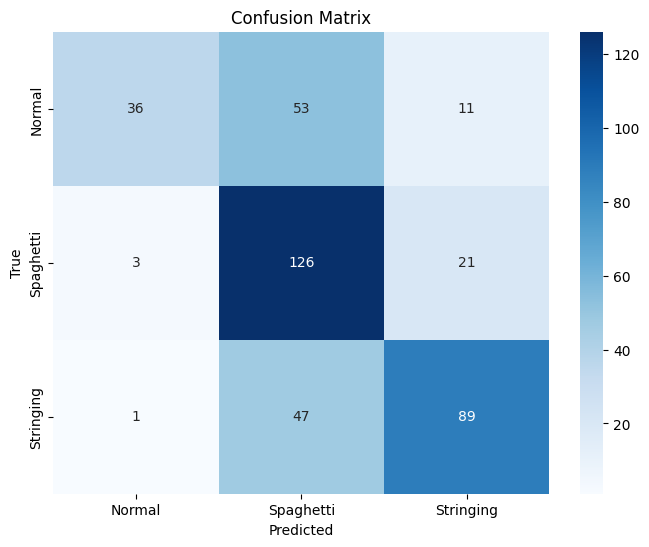

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
test_generator.reset()  # Ensure generator starts from the beginning
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Convert one-hot predictions to class indices
true_classes = test_generator.classes  # True labels from the generator
class_labels = list(test_generator.class_indices.keys())  # Get class labels

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step
Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.36      0.51       100
   Spaghetti       0.56      0.84      0.67       150
   Stringing       0.74      0.65      0.69       137

    accuracy                           0.65       387
   macro avg       0.73      0.62      0.62       387
weighted avg       0.71      0.65      0.64       387

Overall Accuracy: 64.86%
Overall Sensitivity (Recall): 64.86%
Overall Specificity: 64.86%
Precision (Weighted): 70.90%
F1 Score (Weighted): 63.69%
Matthews Correlation Coefficient (MCC): 0.4734
Cohen's Kappa: 0.4477
64.86%
64.86%
64.86%
70.90%
63.69%
0.4734
0.4477


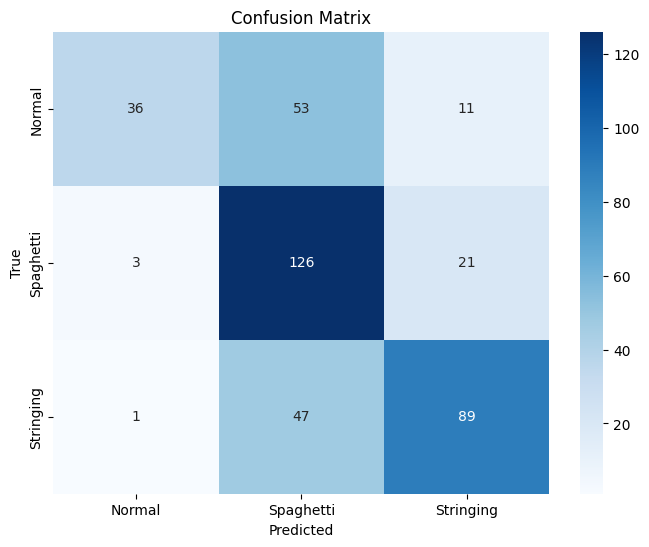

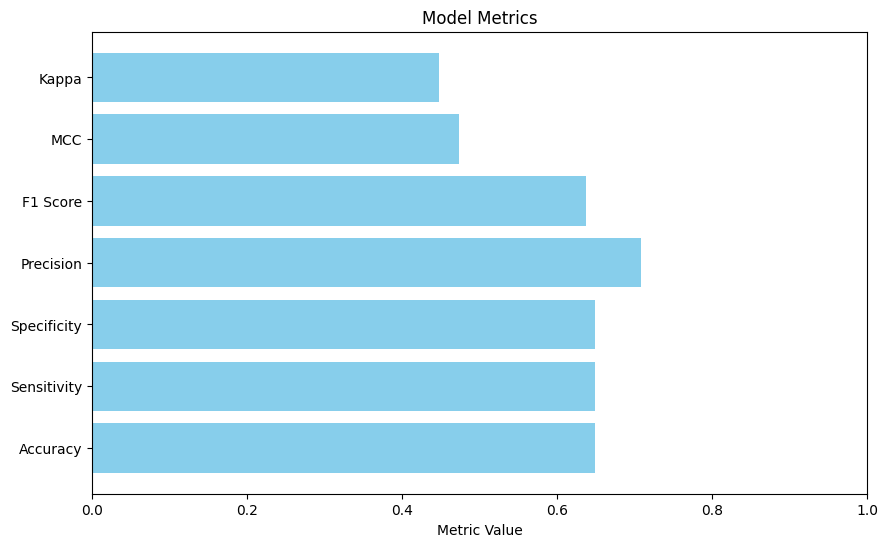

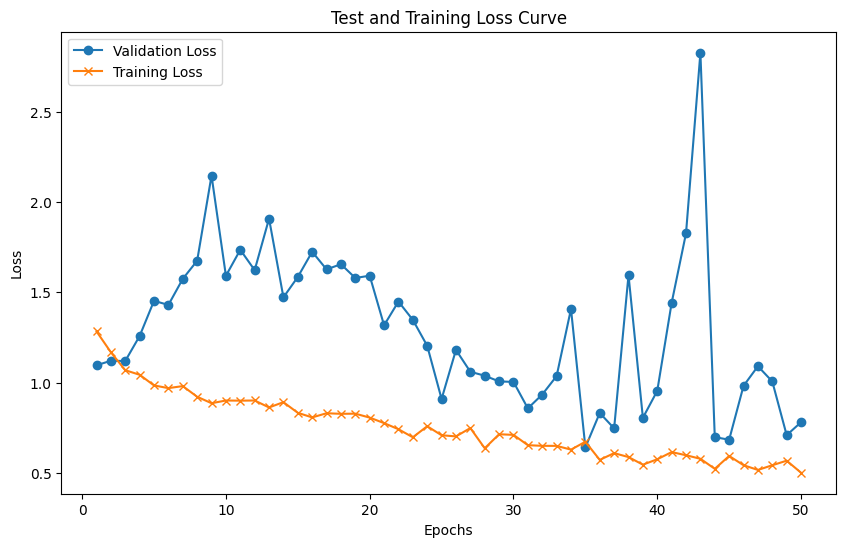

Test Loss: 0.7811259031295776
Training Loss: 0.5015209317207336


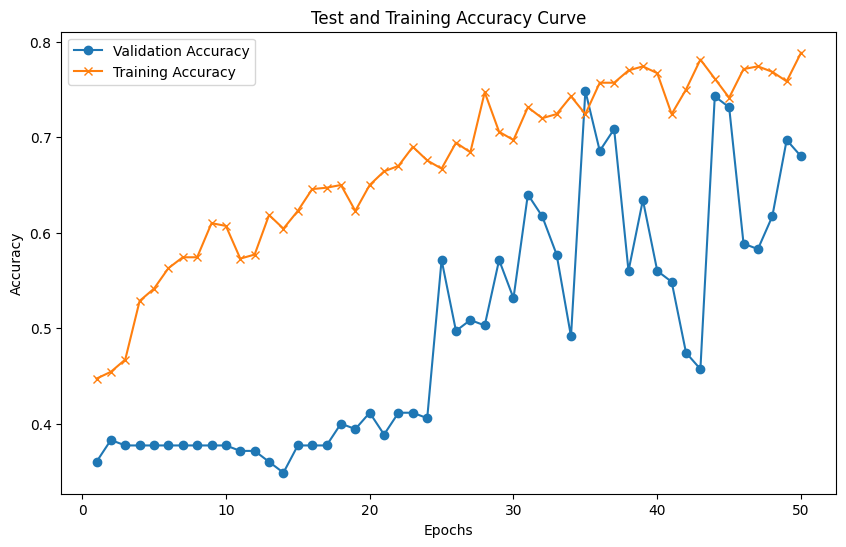

Test Accuracy: 0.6800000071525574
Training Accuracy: 0.7885714173316956
 1/13 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
test_generator.reset()  # Ensure generator starts from the beginning
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Convert one-hot predictions to class indices
true_classes = test_generator.classes  # True labels from the generator
class_labels = list(test_generator.class_indices.keys())  # Get class labels

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Classification Report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Accuracy
accuracy = np.trace(cm) / cm.sum()

# Calculate Sensitivity (Recall) and Specificity
# Sensitivity (Recall) = TP / (TP + FN)
sensitivity = recall_score(true_classes, predicted_classes, average='weighted')

# Specificity (For binary classification: specificity = TN / (TN + FP))
# For multi-class, specificity would need to be calculated per class
specificity = recall_score(true_classes, predicted_classes, average='micro')

# Precision and F1 Score (Weighted average)
precision = precision_score(true_classes, predicted_classes, average="weighted")
f1 = f1_score(true_classes, predicted_classes, average="weighted")

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(true_classes, predicted_classes)

# Cohen's Kappa
kappa = cohen_kappa_score(true_classes, predicted_classes)

# Print metrics
print(f"Overall Accuracy: {accuracy * 100:.2f}%")
print(f"Overall Sensitivity (Recall): {sensitivity * 100:.2f}%")
print(f"Overall Specificity: {specificity * 100:.2f}%")
print(f"Precision (Weighted): {precision * 100:.2f}%")
print(f"F1 Score (Weighted): {f1 * 100:.2f}%")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")

# To Copy easily
print(f"{accuracy * 100:.2f}%")
print(f"{sensitivity * 100:.2f}%")
print(f"{specificity * 100:.2f}%")
print(f"{precision * 100:.2f}%")
print(f"{f1 * 100:.2f}%")
print(f"{mcc:.4f}")
print(f"{kappa:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Plot Metrics
metrics = [accuracy, sensitivity, specificity, precision, f1, mcc, kappa]
metric_names = ["Accuracy", "Sensitivity", "Specificity", "Precision", "F1 Score", "MCC", "Kappa"]

plt.figure(figsize=(10, 6))
plt.barh(metric_names, metrics, color="skyblue")
plt.xlabel("Metric Value")
plt.title("Model Metrics")
plt.xlim(0, 1)  # Metrics are between 0 and 1
plt.show()

# Assuming you have history from training for loss and accuracy curves
epochs = range(1, len(history.history['loss']) + 1)

# Test Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
plt.plot(epochs, history.history['loss'], label='Training Loss', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test and Training Loss Curve')
plt.legend()
plt.show()

print("Test Loss:", history.history['val_loss'][-1])
print("Training Loss:", history.history['loss'][-1])

# Test Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test and Training Accuracy Curve')
plt.legend()
plt.show()

print("Test Accuracy:", history.history['val_accuracy'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
